In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [35]:
shopeasy_df = pd.read_csv('shopEasy.csv')

# Drop the 'personId' column
shopeasy_df.drop('personId', axis=1, inplace=True)

# Display the dataset
shopeasy_df.head()

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,0.166667,1,8,1500.0,236.764555,207.007715,0.00,6,New York,Premium,60
1,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,0.500000,8,0,2000.0,89.741508,173.276205,0.00,6,Los Angeles,Premium,5
2,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,0.083333,1,1,2500.0,234.271939,117.297542,0.25,12,New York,Student,21
3,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,5000.0,0.000000,NaN,0.00,12,Chicago,Premium,53
4,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,1500.0,118.438703,54.138711,0.00,6,New York,Premium,59


In [36]:
missing_values = shopeasy_df.isnull().sum()

print('Missing Values Summary:')
print(missing_values)

Missing Values Summary:
accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCosts             0
emergencyFunds                0
itemBuyFrequency              0
singleItemBuyFrequency        0
multipleItemBuyFrequency      0
emergencyUseFrequency         0
emergencyCount                0
itemCount                     0
maxSpendLimit                 1
monthlyPaid                   0
leastAmountPaid             313
paymentCompletionRate         0
accountLifespan               0
location                      0
accountType                   0
webUsage                      0
dtype: int64


In [37]:
# Fill the missing values in the 'maxSpendLimit' column
shopeasy_df['maxSpendLimit'].fillna(shopeasy_df['maxSpendLimit'].mean(), inplace=True)

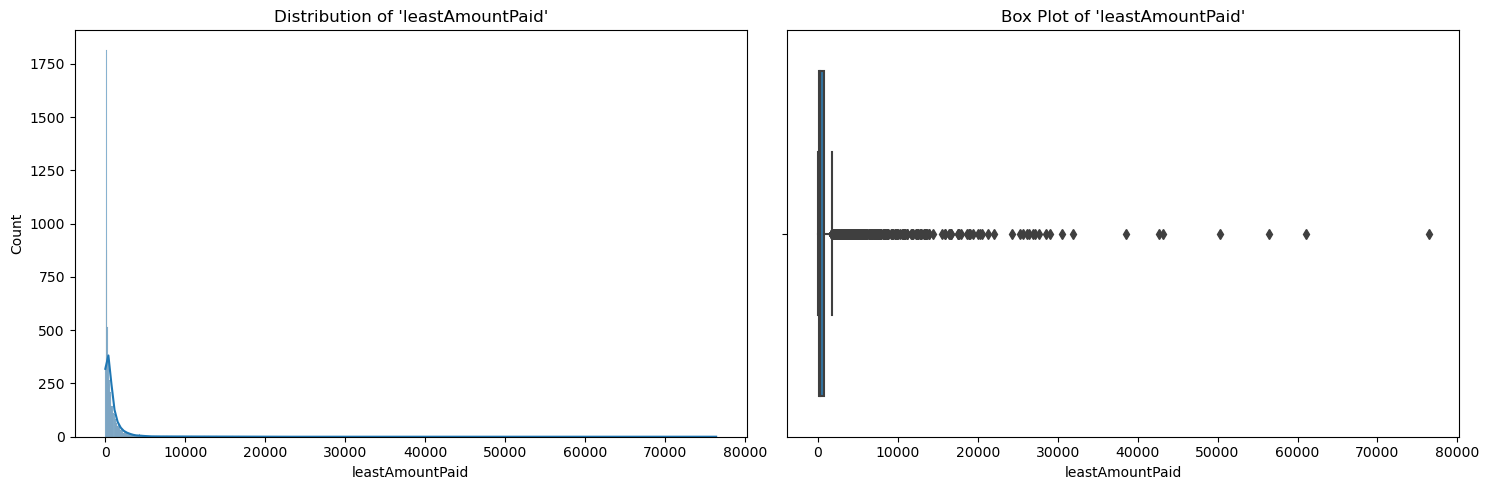

In [38]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Check the distribution of 'leastAmountPaid' to decide between mean and median for imputation
sns.histplot(shopeasy_df['leastAmountPaid'].dropna(), kde=True, ax=axs[0])
axs[0].set_title("Distribution of 'leastAmountPaid'")

# Check for outliers using a box plot
sns.boxplot(x=shopeasy_df['leastAmountPaid'], ax=axs[1])
axs[1].set_title("Box Plot of 'leastAmountPaid'")

plt.tight_layout()
plt.show()


In [39]:
# Fill the missing values in the 'leastAmountPaid' column

# Substitute with 0 when 'itemCount' is 0
shopeasy_df.loc[shopeasy_df['itemCount'] == 0, 'leastAmountPaid'] = 0

# Substitute with 'singleItemCosts' when 'itemCount' is 1
shopeasy_df.loc[shopeasy_df['itemCount'] == 1, 'leastAmountPaid'] = shopeasy_df['singleItemCosts']

# Substitute with the median for the rest
median_leastamountpaid = shopeasy_df['leastAmountPaid'].median()
shopeasy_df['leastAmountPaid'].fillna(median_leastamountpaid, inplace=True)


In [40]:
# Verify if there are any missing values after imputation
missing_values_after_imputation = shopeasy_df.isnull().sum()

print('Missing Values After Imputation Summary:')
print(missing_values_after_imputation)

Missing Values After Imputation Summary:
accountTotal                0
frequencyIndex              0
itemCosts                   0
singleItemCosts             0
multipleItemCosts           0
emergencyFunds              0
itemBuyFrequency            0
singleItemBuyFrequency      0
multipleItemBuyFrequency    0
emergencyUseFrequency       0
emergencyCount              0
itemCount                   0
maxSpendLimit               0
monthlyPaid                 0
leastAmountPaid             0
paymentCompletionRate       0
accountLifespan             0
location                    0
accountType                 0
webUsage                    0
dtype: int64


# Univariate Analysis

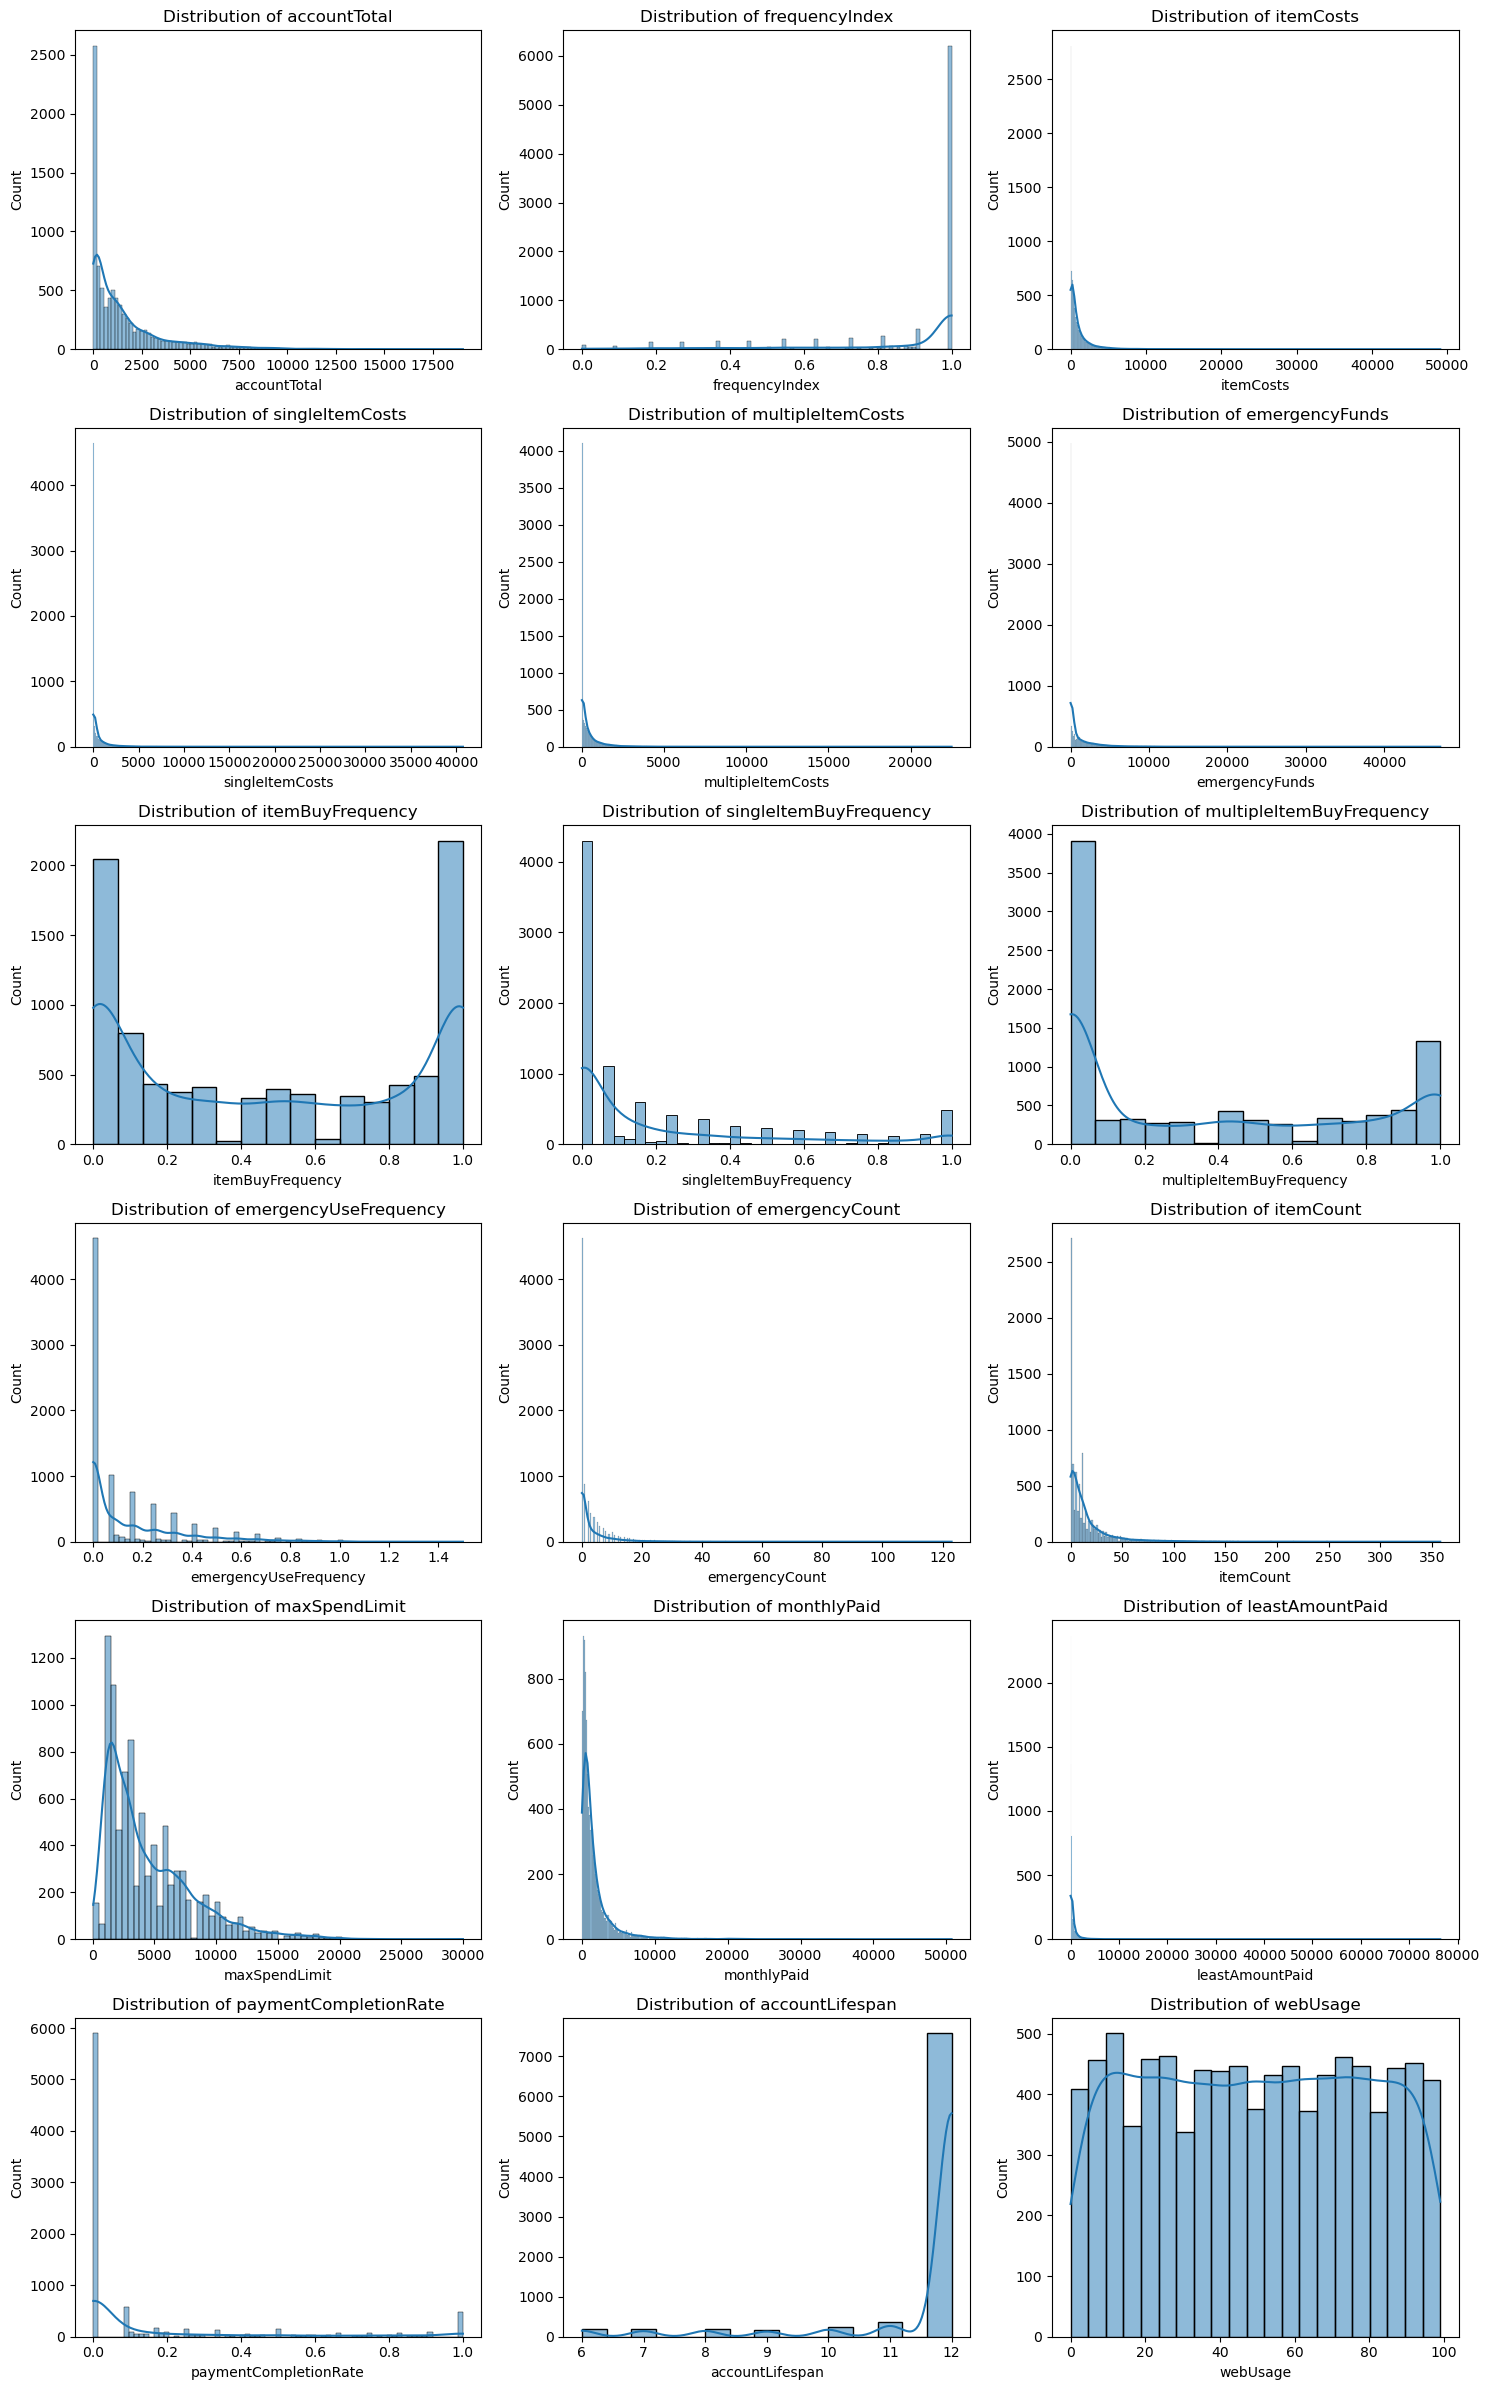

In [41]:
# Selecting numerical features
numerical_features = shopeasy_df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows/columns for the subplot grid
num_features = len(numerical_features)
ncols = 3
nrows = num_features // ncols + (num_features % ncols > 0)

# Creating subplots
plt.figure(figsize=(15, nrows * 4))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(shopeasy_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

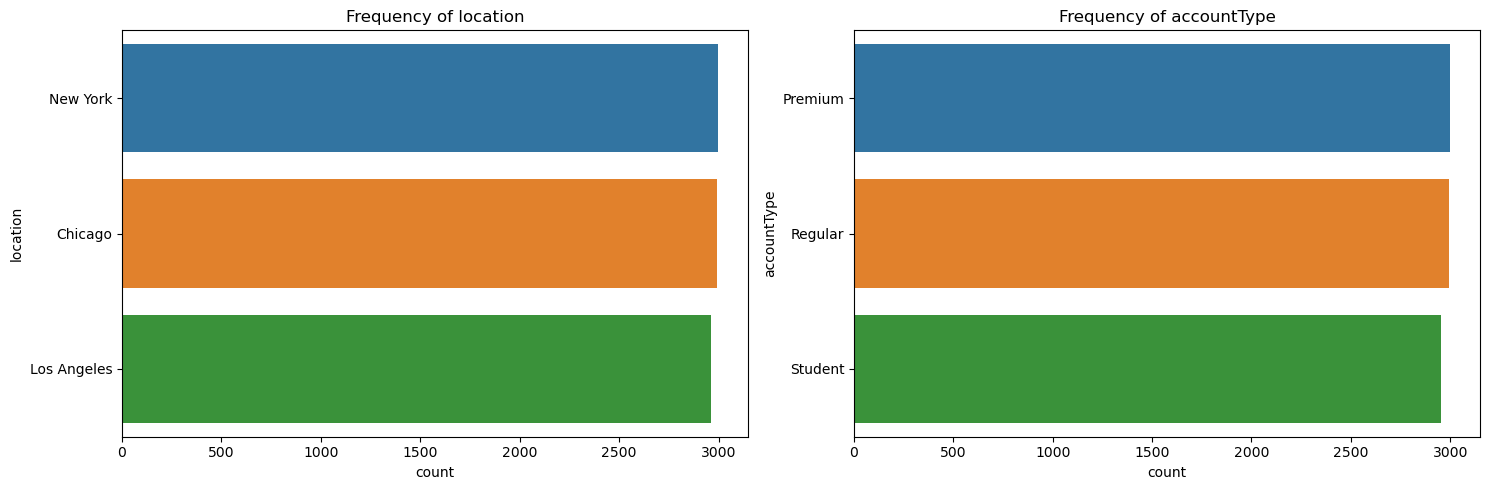

In [42]:
categorical_features = ['location', 'accountType']  # Specify the categorical features you want to plot

# Determine the number of rows/columns for the subplot grid
ncols = 2
nrows = len(categorical_features) // ncols + (len(categorical_features) % ncols > 0)

# Creating subplots for the selected categorical variables
plt.figure(figsize=(15, nrows * 5))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(nrows, ncols, i)
    sns.countplot(y=column, data=shopeasy_df, order=shopeasy_df[column].value_counts().index)
    plt.title(f'Frequency of {column}')
    
plt.tight_layout()
plt.show()


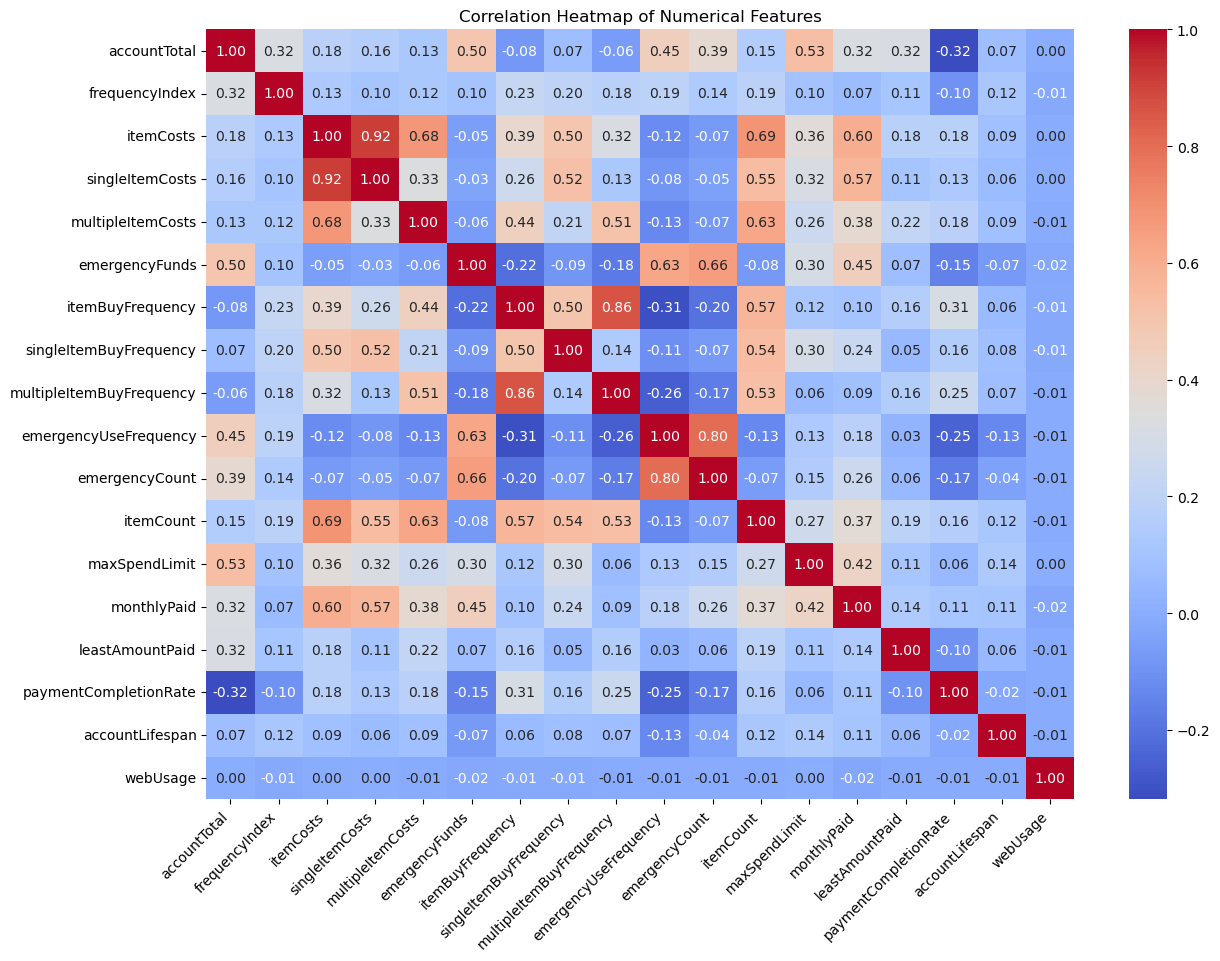

In [43]:
numerical_df = shopeasy_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Analyzing High Correlations

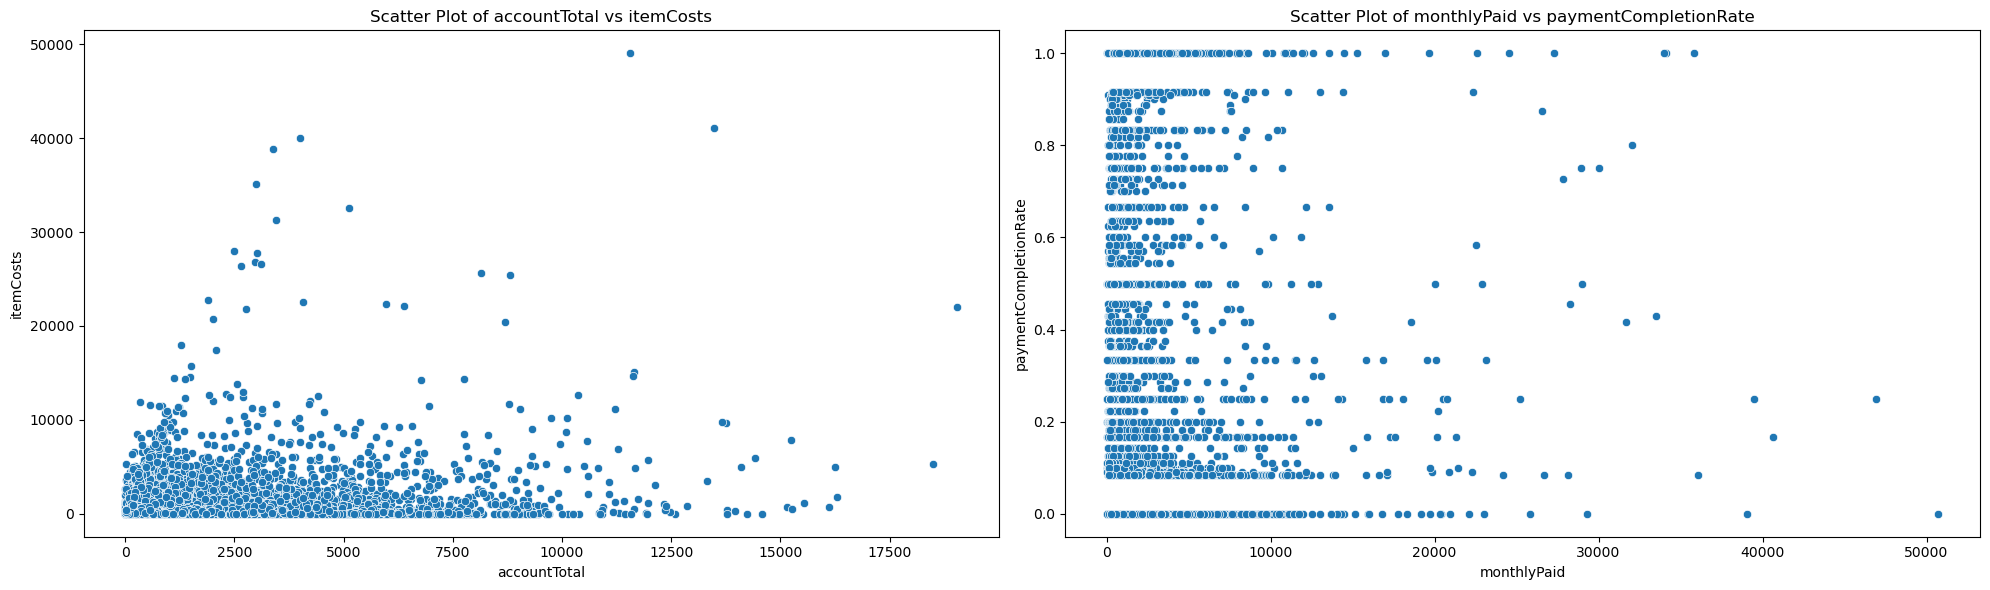

In [44]:
# Sample pairs of features with high correlations
high_corr_pairs = [('accountTotal', 'itemCosts'), ('monthlyPaid', 'paymentCompletionRate')]

# Determine the number of rows/columns for the subplot grid
num_pairs = len(high_corr_pairs)
ncols = 2
nrows = num_pairs // ncols + (num_pairs % ncols > 0)  # Calculate the number of rows

# Creating subplots for scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))

axs = axs.reshape(nrows, ncols)

for i, pair in enumerate(high_corr_pairs):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(data=shopeasy_df, x=pair[0], y=pair[1], ax=axs[row, col])
    axs[row, col].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axs[row, col].set_xlabel(pair[0])
    axs[row, col].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

Observation: There's a positive correlation between these two variables, as expected. Customers who have a higher total spend on ShopEasy tend to also have higher individual item costs.
Reasoning: This correlation is logical because customers who make more expensive purchases will naturally contribute more to their total spending over time.
EDA Action: We could segment users based on their spending patterns to identify high-value customers or analyze the types of items that contribute most to higher spending.

Observation: There's a wide distribution of monthly payments, but the payment completion rate is often 0 or 1, indicating that many users either pay off their purchases in full or not at all in any given month.
Reasoning: This might suggest that some users prefer to pay in installments, while others pay in full, which could be indicative of different financial behaviors or preferences.
EDA Action: Investigate the characteristics of users who have high monthly payments with different completion rates to understand if there are distinct financial behavior patterns.

# Surprising Correlations

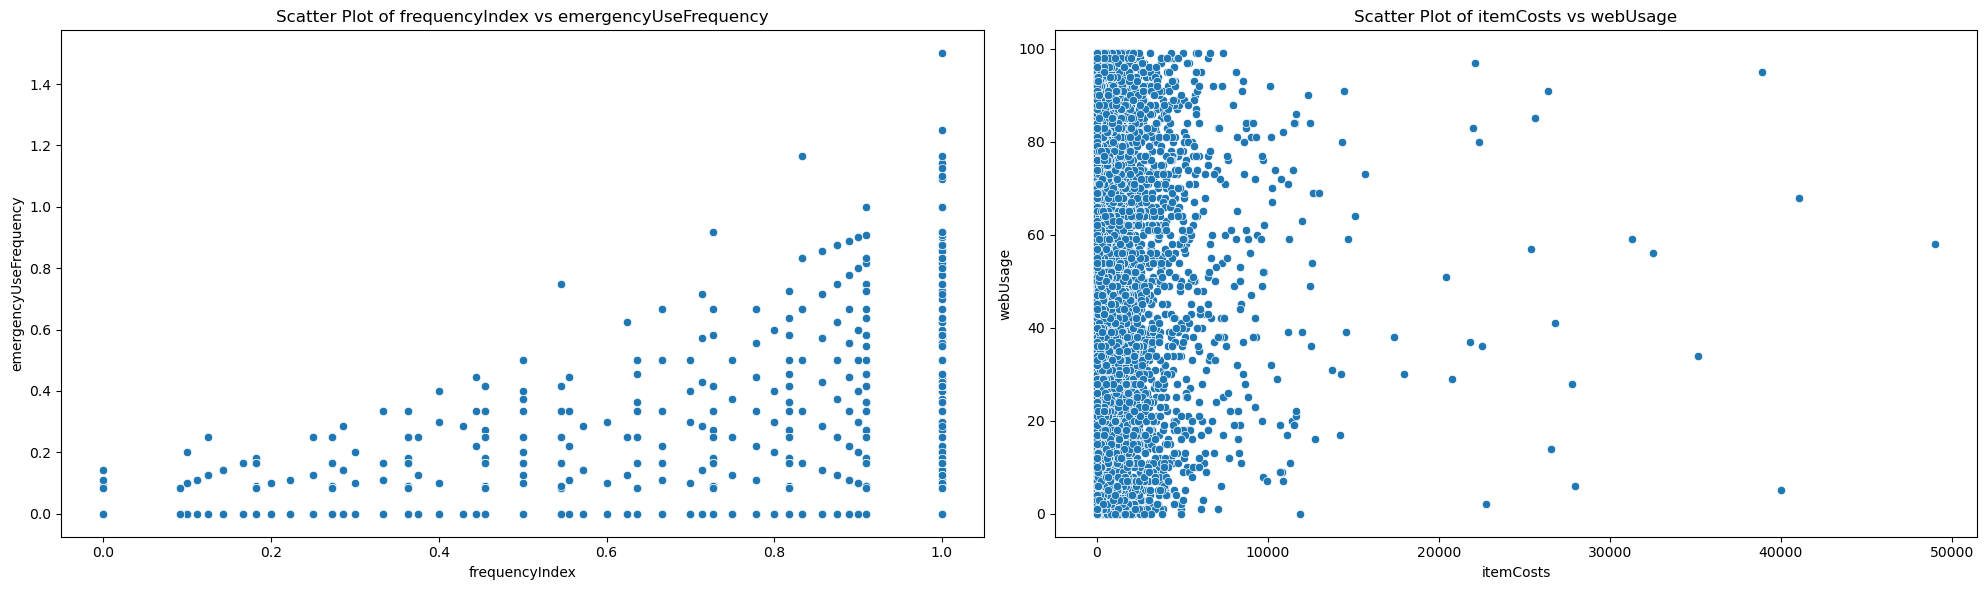

In [45]:
# Sample pairs of features with surprising correlations
surprising_corr_pairs = [('frequencyIndex', 'emergencyUseFrequency'), ('itemCosts', 'webUsage')]

# Determine the number of rows/columns for the subplot grid
num_pairs = len(surprising_corr_pairs)
ncols = 2 

# Determine the number of rows/columns for the subplot grid
nrows = num_pairs // ncols + (num_pairs % ncols > 0)

# Creating subplots for scatter plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))
axs = axs.reshape(nrows, ncols)

for i, pair in enumerate(surprising_corr_pairs):
    row = i // ncols
    col = i % ncols
    sns.scatterplot(data=shopeasy_df, x=pair[0], y=pair[1], ax=axs[row, col])
    axs[row, col].set_title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    axs[row, col].set_xlabel(pair[0])
    axs[row, col].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

Observation: The scatter plot doesn't show a strong linear relationship, which is surprising given that one might expect frequent shoppers to use emergency funds more often.
Reasoning: This could indicate that emergency funds are not directly related to shopping frequency but to other factors like financial planning or unexpected needs.

Observation: There doesn't appear to be a strong relationship between the cost of items purchased and web usage. This suggests that frequent web users are not necessarily spending more per item.
Reasoning: This might imply that web usage is a separate behavioral trait and doesn't influence the type or cost of items purchased.

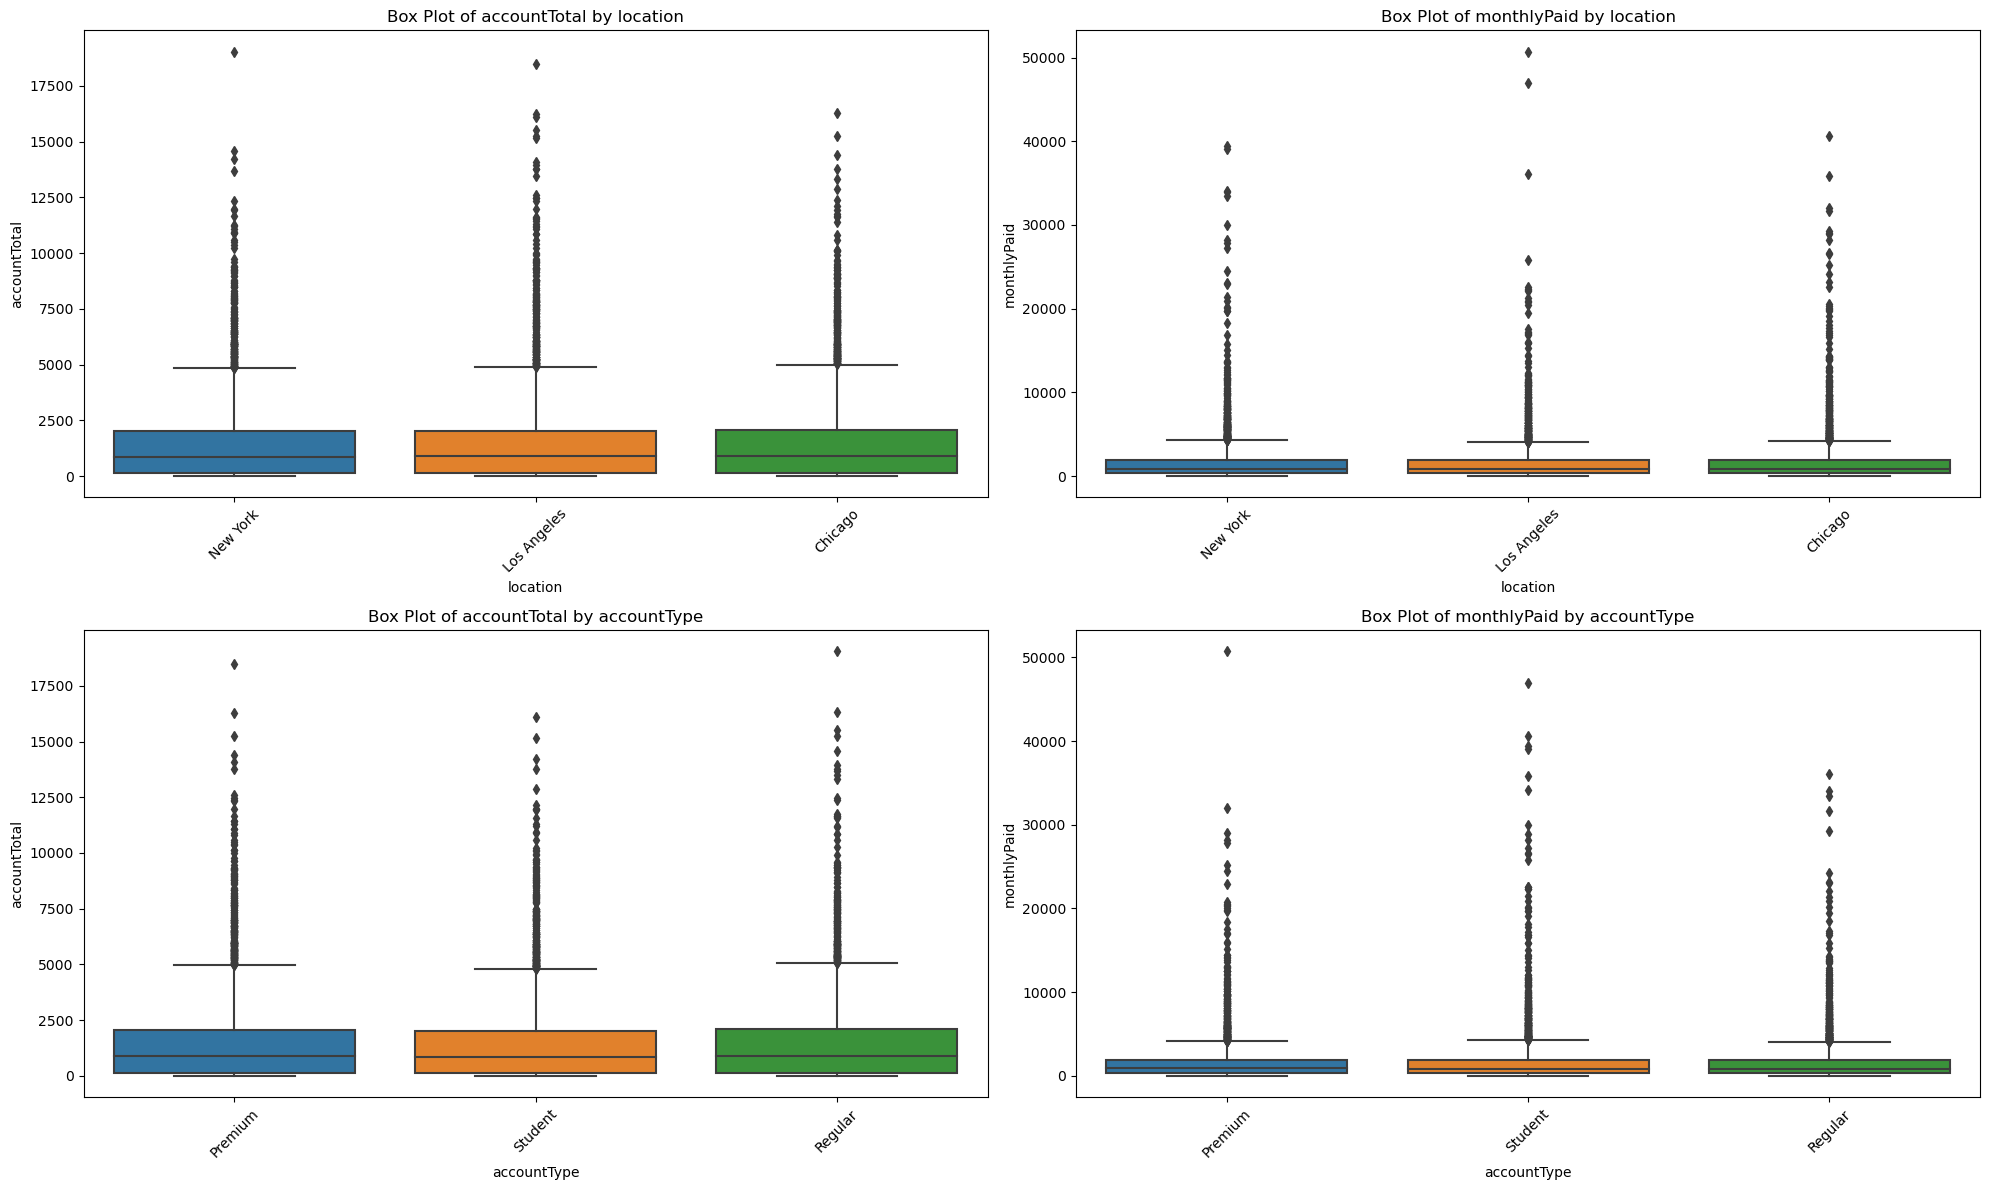

In [46]:
# Features to explore against categorical variables
numerical_features = ['accountTotal', 'monthlyPaid']
categorical_features = ['location', 'accountType']

num_plots = len(numerical_features) * len(categorical_features)
ncols = 2
nrows = num_plots // ncols + (num_plots % ncols > 0)

# Creating subplots for box plots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 6*nrows))

for i, (cat_feature, num_feature) in enumerate(product(categorical_features, numerical_features)):
    row = i // ncols
    col = i % ncols
    sns.boxplot(x=cat_feature, y=num_feature, data=shopeasy_df, ax=axs[row, col])
    axs[row, col].set_title(f'Box Plot of {num_feature} by {cat_feature}')
    axs[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


c:\Users\Utente\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


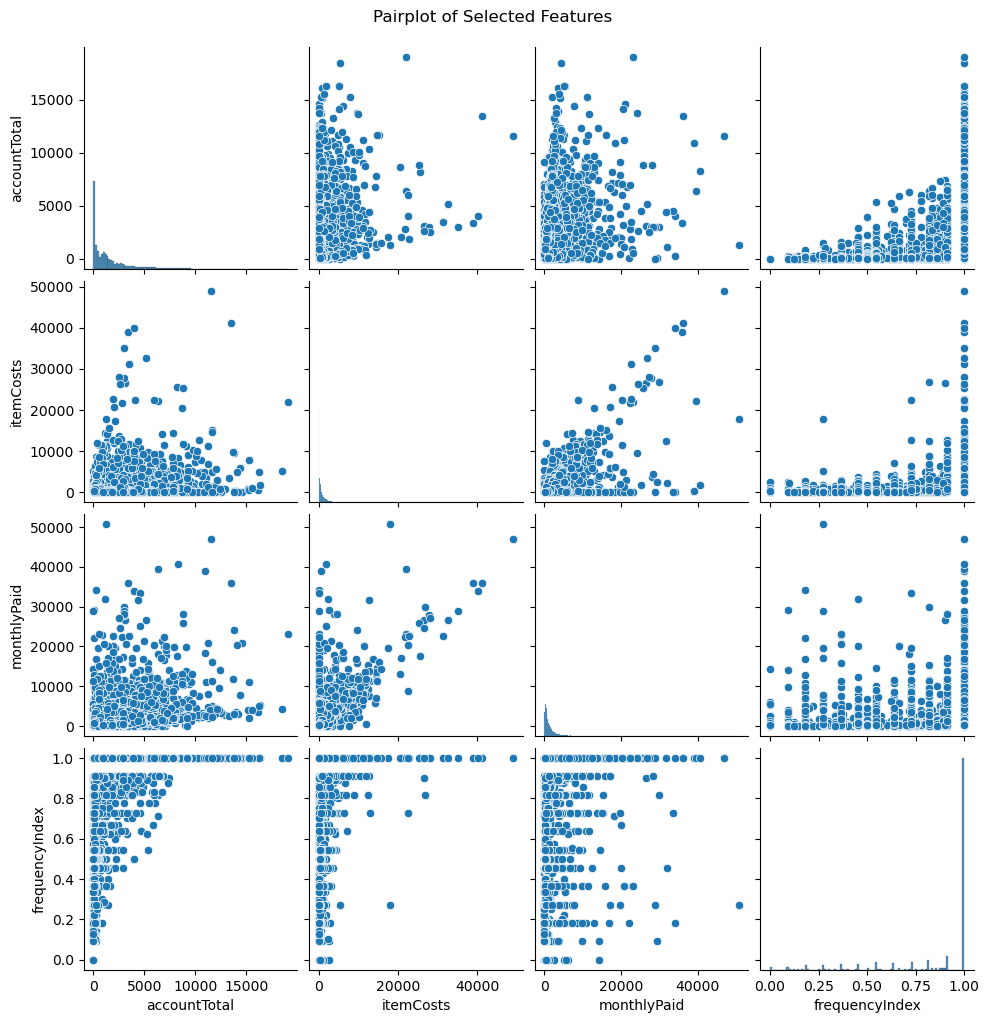

In [47]:
# Selected features for pairplots
selected_features_for_pairplot = ['accountTotal', 'itemCosts', 'monthlyPaid', 'frequencyIndex']

# Create pairplots
sns.pairplot(shopeasy_df[selected_features_for_pairplot])
plt.suptitle('Pairplot of Selected Features', y=1.02)  # Adjust y for the title to display correctly
plt.show()


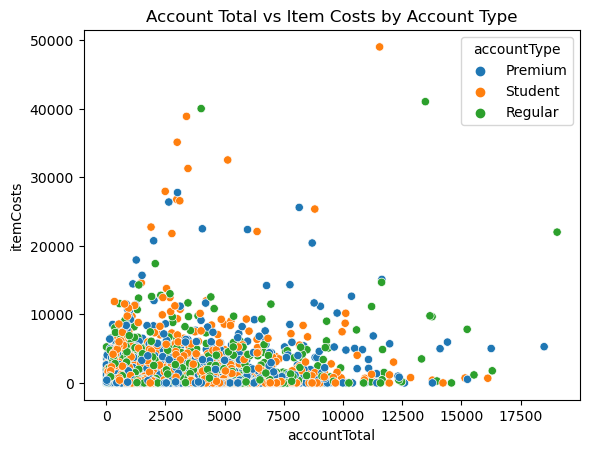

In [48]:
# Explore relationships between variables
sns.scatterplot(x='accountTotal', y='itemCosts', hue='accountType', data=shopeasy_df)
plt.title('Account Total vs Item Costs by Account Type')
plt.show()


In [49]:
# One-hot encoding for 'location'
shopeasy_df_encoded = pd.get_dummies(shopeasy_df, columns=['location'])

# Label encoding for 'accountType'
le = LabelEncoder()
shopeasy_df_encoded['accountType_encoded'] = le.fit_transform(shopeasy_df_encoded['accountType'])

# Drop the original 'accountType' column
shopeasy_df_encoded.drop(['accountType'], axis=1, inplace=True)

# Display the encoded dataset
shopeasy_df_encoded.head()

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage,location_Chicago,location_Los Angeles,location_New York,accountType_encoded
0,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,0.166667,...,1500.0,236.764555,207.007715,0.00,6,60,False,False,True,0
1,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,0.500000,...,2000.0,89.741508,0.000000,0.00,6,5,False,True,False,0
2,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,0.083333,...,2500.0,234.271939,334.730000,0.25,12,21,False,False,True,2
3,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,0.000000,...,5000.0,0.000000,0.000000,0.00,12,53,True,False,False,0
4,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,1500.0,118.438703,57.000000,0.00,6,59,False,False,True,0


In [50]:
# Selecting columns to scale (excluding one-hot encoded and label encoded columns)
columns_to_scale = [col for col in shopeasy_df.columns if (col != 'location' and col != 'accountType')]

# Initializing StandardScaler
scaler = StandardScaler()

# Creating a new DataFrame for the scaled version
shopeasy_df_scaled = shopeasy_df_encoded.copy()
shopeasy_df_scaled[columns_to_scale] = scaler.fit_transform(shopeasy_df_encoded[columns_to_scale])

# Displaying the first few rows of the scaled and encoded dataframe
shopeasy_df_scaled.head()


,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage,location_Chicago,location_Los Angeles,location_New York,accountType_encoded
0,-0.254545,-0.185477,0.142711,0.431181,-0.454576,-0.354913,0.024043,0.997395,-0.916995,0.157527,...,-0.823011,-0.516902,-0.194497,-0.525551,-4.122768,0.367188,False,False,True,0
1,-0.377926,-0.889033,-0.469552,-0.356934,-0.454576,0.401170,-1.221758,-0.678661,-0.916995,1.823274,...,-0.685588,-0.567688,-0.300354,-0.525551,-4.122768,-1.542096,False,True,False,0
2,-0.704819,-0.249434,-0.312881,-0.155265,-0.454576,-0.457462,-1.014125,-0.399319,-0.916995,-0.258913,...,-0.548165,-0.517763,-0.129185,0.329200,0.360680,-0.986668,False,False,True,2
3,-0.751640,-3.703271,-0.463631,-0.356934,-0.440587,-0.466786,-1.014125,-0.678661,-0.707313,-0.675349,...,0.138948,-0.598688,-0.300354,-0.525551,0.360680,0.124188,True,False,False,0
4,-0.742934,-1.592594,-0.442873,-0.322592,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,...,-0.823011,-0.557775,-0.271206,-0.525551,-4.122768,0.332473,False,False,True,0


C:\Users\Utente\AppData\Local\Temp\ipykernel_16316\2364615417.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



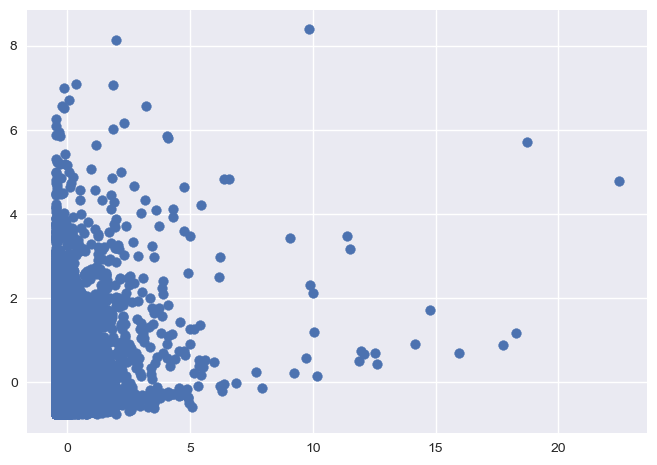

In [143]:
itemcost_acctot = shopeasy_df_scaled[['itemCosts', 'accountTotal']]
itemcost, acctot = shopeasy_df_scaled.itemCosts, shopeasy_df_scaled.accountTotal
plt.style.use('seaborn')
plt.scatter(itemcost, acctot)

In [125]:
from sklearn.cluster import DBSCAN

X = itemcost_acctot.to_numpy()

dbscan_cluster_model = DBSCAN().fit(X)
dbscan_cluster_model

DBSCAN()

In [126]:
shopeasy_df_scaled['cluster'] = dbscan_cluster_model.labels_
shopeasy_df_scaled.head()

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,webUsage,location_Chicago,location_Los Angeles,location_New York,accountType_encoded,cluster
0,-0.254545,-0.185477,0.142711,0.431181,-0.454576,-0.354913,0.024043,0.997395,-0.916995,0.157527,...,-0.516902,-0.194497,-0.525551,-4.122768,0.367188,False,False,True,0,0
1,-0.377926,-0.889033,-0.469552,-0.356934,-0.454576,0.401170,-1.221758,-0.678661,-0.916995,1.823274,...,-0.567688,-0.300354,-0.525551,-4.122768,-1.542096,False,True,False,0,0
2,-0.704819,-0.249434,-0.312881,-0.155265,-0.454576,-0.457462,-1.014125,-0.399319,-0.916995,-0.258913,...,-0.517763,-0.129185,0.329200,0.360680,-0.986668,False,False,True,2,0
3,-0.751640,-3.703271,-0.463631,-0.356934,-0.440587,-0.466786,-1.014125,-0.678661,-0.707313,-0.675349,...,-0.598688,-0.300354,-0.525551,0.360680,0.124188,True,False,False,0,0
4,-0.742934,-1.592594,-0.442873,-0.322592,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,...,-0.557775,-0.271206,-0.525551,-4.122768,0.332473,False,False,True,0,0


In [127]:
shopeasy_df_scaled['cluster'].value_counts()

cluster
 0    8893
-1      57
Name: count, dtype: int64

In [129]:
import plotly.express as px

fig = px.scatter(shopeasy_df_scaled, x='itemCosts', y='accountTotal', color='cluster')

fig.show()

In [130]:
from sklearn.metrics import silhouette_score as ss

ss(X, shopeasy_df_scaled['cluster'])

0.8533491041331932

In [131]:
epsilon = np.linspace(0.01, 1, num = 15)
epsilon

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [132]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [133]:
import itertools

combinations = list(itertools.product(epsilon, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [134]:
N = len(combinations)
N

90

In [135]:
def get_scores_and_labels(combinations, X):
    scores = []
    all_labels_list = []

    for i, (eps, min_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1

        if (num_clusters < 2) or (num_clusters > 50):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps, min_samples)
            print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving On")
            continue

        scores.append(ss(X, labels))
        all_labels_list.append(labels)
        print(f"Index: {i}, Score: {scores[i]},Labels: {all_labels_list[-1]}, Number of clusters: {num_clusters}")
        
    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]

    return {'best_epsilon': best_parameters[0],
            'best_min_samples': best_parameters[1], 
            'best_score': best_score, 
            'best_labels': best_labels}

best_dict = get_scores_and_labels(combinations, X)

Combination (0.01, 2) on iteration 1 of 90 has 648 clusters. Moving On
Combination (0.01, 5) on iteration 2 of 90 has 97 clusters. Moving On
Index: 2, Score: -0.6306659669502529,Labels: [-1  0  0 ...  0 -1 -1], Number of clusters: 28
Index: 3, Score: -0.5125430964919441,Labels: [-1  0  1 ...  0 -1 -1], Number of clusters: 19
Index: 4, Score: -0.2330095550410779,Labels: [-1  0 -1 ...  0 -1 -1], Number of clusters: 14
Index: 5, Score: -0.3019670187939948,Labels: [-1  0 -1 ...  9 -1 -1], Number of clusters: 12
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 108 clusters. Moving On
Index: 7, Score: 0.16075536926599382,Labels: [0 0 0 ... 0 0 0], Number of clusters: 22
Index: 8, Score: 0.12824450775889962,Labels: [0 0 0 ... 0 0 0], Number of clusters: 13
Index: 9, Score: 0.05735343908298687,Labels: [0 0 0 ... 0 0 0], Number of clusters: 7
Index: 10, Score: 0.03401056052271579,Labels: [0 0 0 ... 0 0 0], Number of clusters: 7
Index: 11, Score: 0.0042230721845474,Labels: [0 0 0 ..

In [136]:
best_dict

{'best_epsilon': 0.9292857142857143,
 'best_min_samples': 5,
 'best_score': 0.8769225198746073,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

In [137]:
shopeasy_df_scaled['cluster'] = best_dict['best_labels']

shopeasy_df_scaled['cluster'].value_counts()

cluster
 0    8916
-1      29
 1       5
Name: count, dtype: int64

In [153]:
fig = px.scatter(shopeasy_df_scaled, x='itemCosts', y='accountTotal', color='cluster')

fig.show()

In [144]:
X2 = shopeasy_df_scaled[['itemBuyFrequency', 'itemCosts']].to_numpy()
X2

array([[ 0.02404259,  0.14271143],
       [-1.22175806, -0.46955188],
       [-1.01412545, -0.31288089],
       ...,
       [-1.22175806, -0.46955188],
       [-1.01412545, -0.3993441 ],
       [-0.80649035, -0.41518766]])

In [145]:
best_dict2 = get_scores_and_labels(combinations, X2)
best_dict2

Combination (0.01, 2) on iteration 1 of 90 has 378 clusters. Moving On
Combination (0.01, 5) on iteration 2 of 90 has 114 clusters. Moving On
Combination (0.01, 8) on iteration 3 of 90 has 81 clusters. Moving On
Combination (0.01, 11) on iteration 4 of 90 has 52 clusters. Moving On
Index: 4, Score: 0.1399133336841861,Labels: [-1  0  1 ...  0  1  2], Number of clusters: 38
Index: 5, Score: 0.11800050864561401,Labels: [-1  0  1 ...  0  2  3], Number of clusters: 30
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 61 clusters. Moving On
Index: 7, Score: 0.2832825614709134,Labels: [0 1 2 ... 1 2 2], Number of clusters: 16
Index: 8, Score: 0.27917692661708243,Labels: [0 1 2 ... 1 2 2], Number of clusters: 11
Index: 9, Score: 0.26749227880890314,Labels: [0 1 2 ... 1 2 2], Number of clusters: 12
Index: 10, Score: 0.23415175199131558,Labels: [0 1 2 ... 1 2 2], Number of clusters: 12
Index: 11, Score: 0.2509566114073739,Labels: [0 1 2 ... 1 2 2], Number of clusters: 12
Index: 12, S

{'best_epsilon': 0.505,
 'best_min_samples': 5,
 'best_score': 0.8487126366045972,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64)}

In [146]:
shopeasy_df_scaled['cluster2'] = best_dict2['best_labels']
shopeasy_df_scaled['cluster2'].value_counts()
fig = px.scatter(shopeasy_df_scaled, x='itemBuyFrequency', y='itemCosts', color='cluster2')

fig.show()